# **Naive Bayes model for HMEQ Dataset**

In [1]:
from src import utilities
from src import evaluation

from sklearn.naive_bayes import GaussianNB

hmeq_dataset_path = '../../../datasets/preprocessed/hmeq/'

2023-03-10 17:01:32.019021: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-10 17:01:32.644516: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-10 17:01:32.644564: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-03-10 17:01:32.644568: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

Model save_path: ../../../models/GNB/2023-03-10_17-01-33


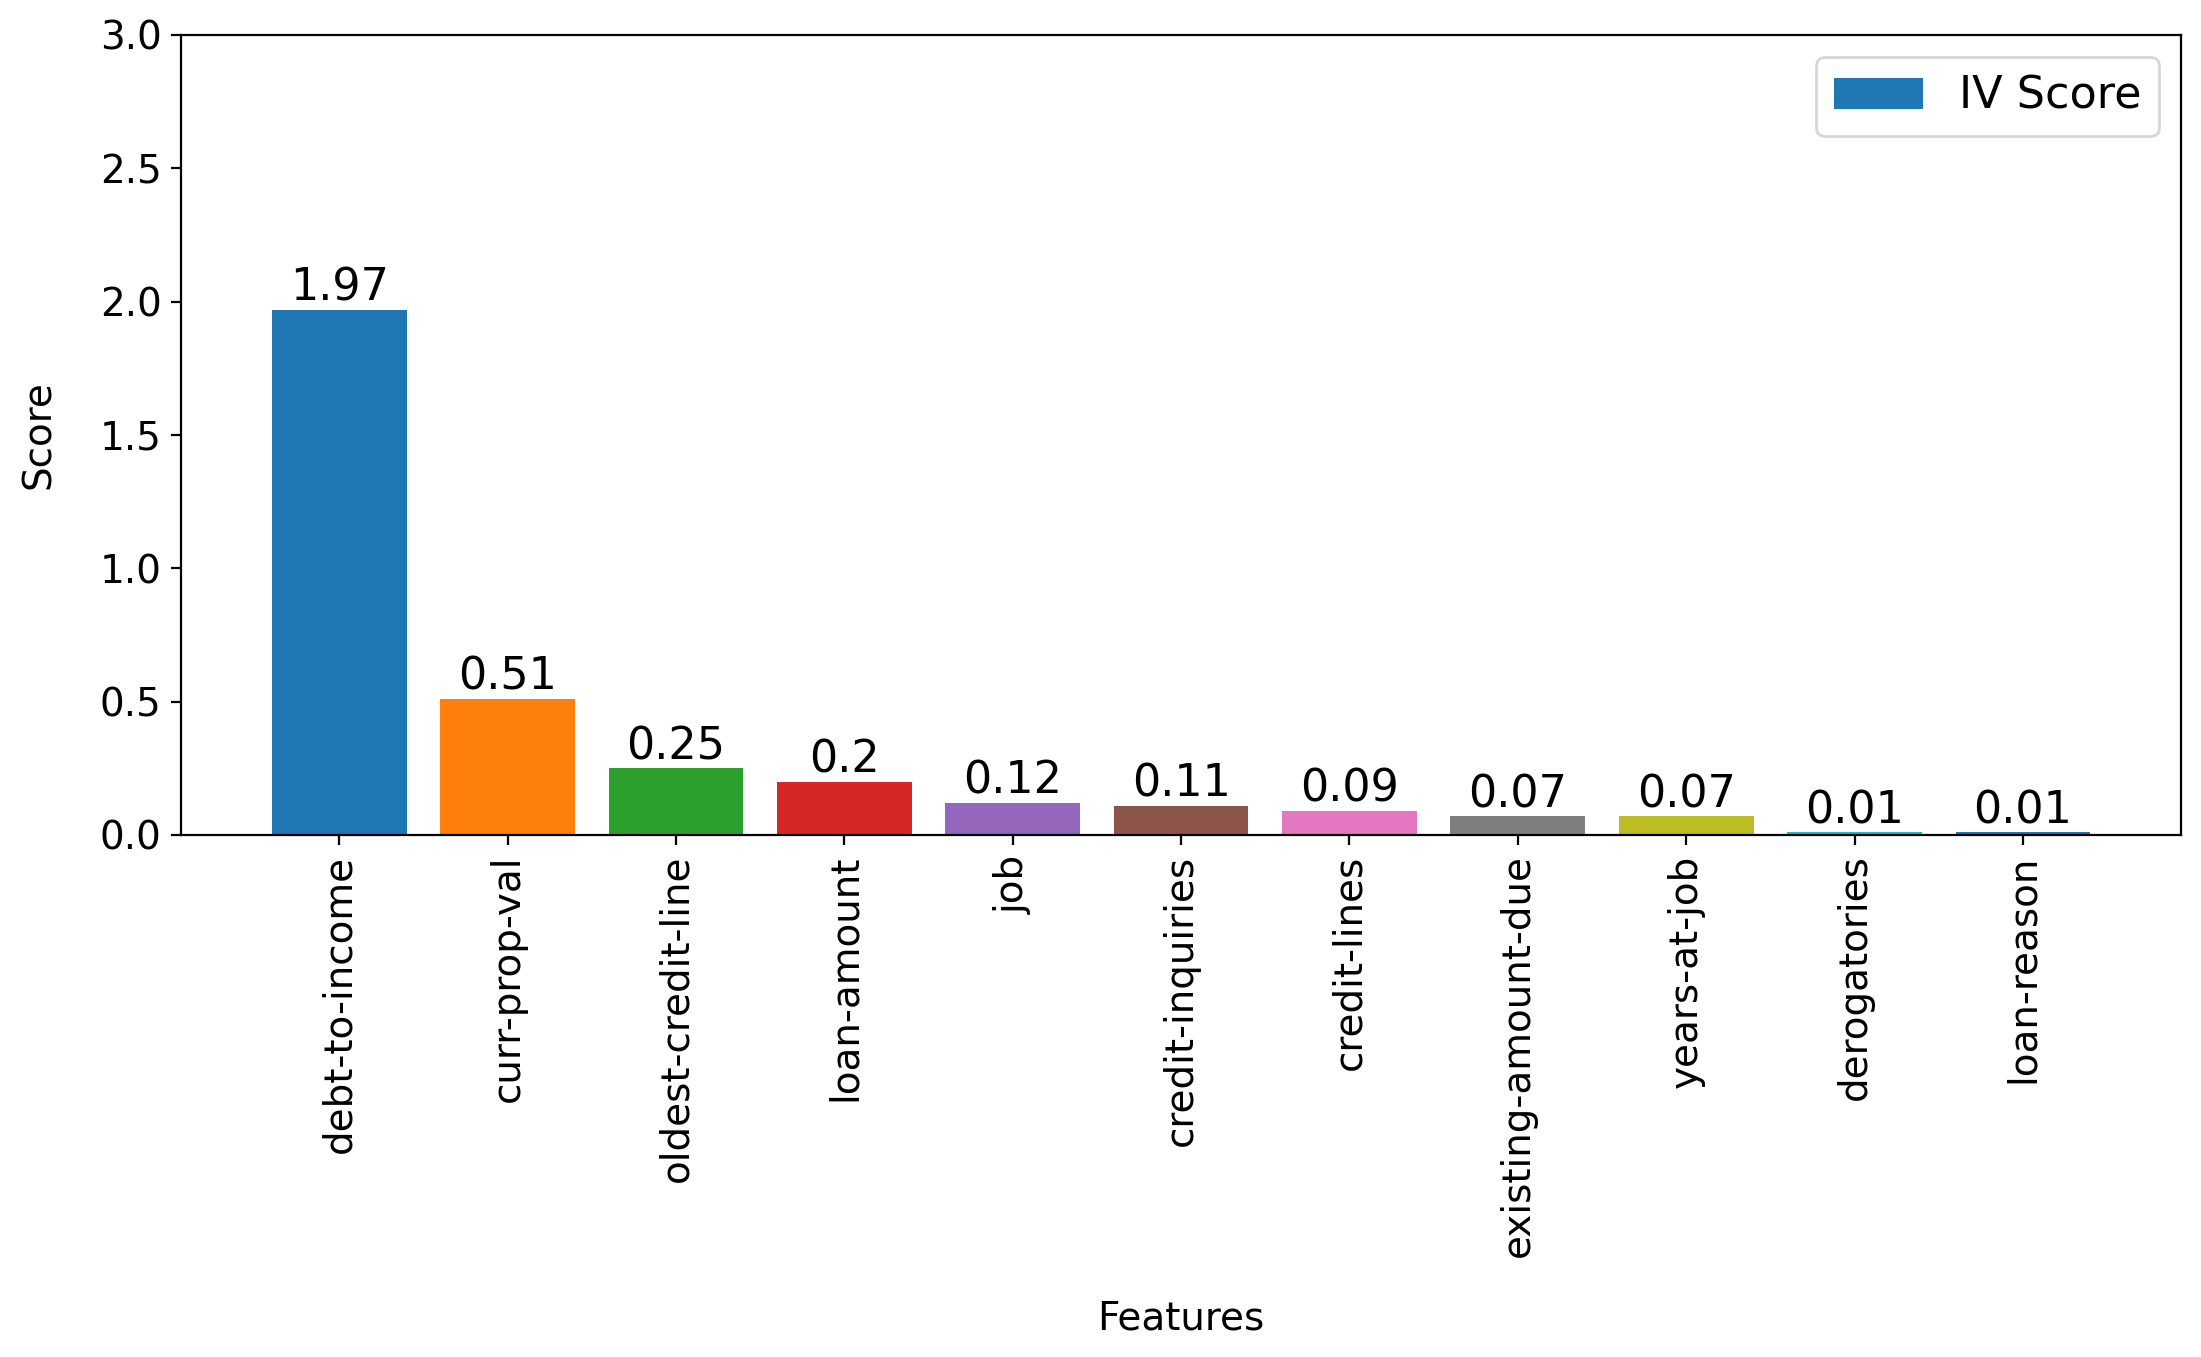

Selected Features: ['debt-to-income', 'curr-prop-val', 'oldest-credit-line', 'loan-amount', 'job', 'credit-inquiries', 'credit-lines', 'existing-amount-due', 'years-at-job', 'derogatories', 'loan-reason']


0it [00:00, ?it/s]

# **FOLD 1**

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      3435
           1       0.61      0.61      0.61       856

    accuracy                           0.84      4291
   macro avg       0.75      0.76      0.75      4291
weighted avg       0.84      0.84      0.84      4291

              precision    recall  f1-score   support

           0       0.89      0.86      0.88       382
           1       0.51      0.58      0.54        95

    accuracy                           0.81       477
   macro avg       0.70      0.72      0.71       477
weighted avg       0.82      0.81      0.81       477



/home/rr/.local/lib/python3.10/site-packages/EMP/metrics.py:154: RuntimeWarning: divide by zero encountered in divide
  lambda_values = np.append(0, (((roc[3]*ROI) / roc[2])*(np.diff(roc[5]) / np.diff(roc[4]))))


# **FOLD 2**

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      3435
           1       0.60      0.61      0.61       856

    accuracy                           0.84      4291
   macro avg       0.75      0.76      0.75      4291
weighted avg       0.84      0.84      0.84      4291

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       382
           1       0.60      0.55      0.57        95

    accuracy                           0.84       477
   macro avg       0.74      0.73      0.74       477
weighted avg       0.83      0.84      0.83       477



/home/rr/.local/lib/python3.10/site-packages/EMP/metrics.py:154: RuntimeWarning: divide by zero encountered in divide
  lambda_values = np.append(0, (((roc[3]*ROI) / roc[2])*(np.diff(roc[5]) / np.diff(roc[4]))))


# **FOLD 3**

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      3435
           1       0.60      0.61      0.60       856

    accuracy                           0.84      4291
   macro avg       0.75      0.75      0.75      4291
weighted avg       0.84      0.84      0.84      4291

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       382
           1       0.66      0.68      0.67        95

    accuracy                           0.87       477
   macro avg       0.79      0.80      0.79       477
weighted avg       0.87      0.87      0.87       477



/home/rr/.local/lib/python3.10/site-packages/EMP/metrics.py:154: RuntimeWarning: divide by zero encountered in divide
  lambda_values = np.append(0, (((roc[3]*ROI) / roc[2])*(np.diff(roc[5]) / np.diff(roc[4]))))


# **FOLD 4**

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      3435
           1       0.60      0.61      0.60       856

    accuracy                           0.84      4291
   macro avg       0.75      0.75      0.75      4291
weighted avg       0.84      0.84      0.84      4291

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       382
           1       0.60      0.55      0.57        95

    accuracy                           0.84       477
   macro avg       0.74      0.73      0.74       477
weighted avg       0.83      0.84      0.83       477



/home/rr/.local/lib/python3.10/site-packages/EMP/metrics.py:154: RuntimeWarning: divide by zero encountered in divide
  lambda_values = np.append(0, (((roc[3]*ROI) / roc[2])*(np.diff(roc[5]) / np.diff(roc[4]))))


# **FOLD 5**

/home/rr/.local/lib/python3.10/site-packages/EMP/metrics.py:154: RuntimeWarning: divide by zero encountered in divide
  lambda_values = np.append(0, (((roc[3]*ROI) / roc[2])*(np.diff(roc[5]) / np.diff(roc[4]))))
5it [00:00, 44.03it/s]

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      3435
           1       0.60      0.61      0.60       856

    accuracy                           0.84      4291
   macro avg       0.75      0.75      0.75      4291
weighted avg       0.84      0.84      0.84      4291

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       382
           1       0.67      0.58      0.62        95

    accuracy                           0.86       477
   macro avg       0.78      0.75      0.77       477
weighted avg       0.85      0.86      0.86       477



# **FOLD 6**

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      3435
           1       0.60      0.61      0.60       856

    accuracy                           0.84      4291
   macro avg       0.75      0.75      0.75      4291
weighted avg       0.84      0.84      0.84      4291

              precision    recall  f1-score   support

           0       0.89      0.88      0.89       382
           1       0.56      0.58      0.57        95

    accuracy                           0.82       477
   macro avg       0.72      0.73      0.73       477
weighted avg       0.83      0.82      0.83       477



/home/rr/.local/lib/python3.10/site-packages/EMP/metrics.py:154: RuntimeWarning: divide by zero encountered in divide
  lambda_values = np.append(0, (((roc[3]*ROI) / roc[2])*(np.diff(roc[5]) / np.diff(roc[4]))))


# **FOLD 7**

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      3435
           1       0.60      0.61      0.60       856

    accuracy                           0.84      4291
   macro avg       0.75      0.75      0.75      4291
weighted avg       0.84      0.84      0.84      4291

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       382
           1       0.59      0.55      0.57        95

    accuracy                           0.83       477
   macro avg       0.74      0.73      0.73       477
weighted avg       0.83      0.83      0.83       477



/home/rr/.local/lib/python3.10/site-packages/EMP/metrics.py:154: RuntimeWarning: divide by zero encountered in divide
  lambda_values = np.append(0, (((roc[3]*ROI) / roc[2])*(np.diff(roc[5]) / np.diff(roc[4]))))


# **FOLD 8**

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      3436
           1       0.60      0.61      0.61       855

    accuracy                           0.84      4291
   macro avg       0.75      0.75      0.75      4291
weighted avg       0.84      0.84      0.84      4291

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       381
           1       0.58      0.65      0.61        96

    accuracy                           0.83       477
   macro avg       0.74      0.76      0.75       477
weighted avg       0.84      0.83      0.84       477



/home/rr/.local/lib/python3.10/site-packages/EMP/metrics.py:154: RuntimeWarning: divide by zero encountered in divide
  lambda_values = np.append(0, (((roc[3]*ROI) / roc[2])*(np.diff(roc[5]) / np.diff(roc[4]))))


# **FOLD 9**

/home/rr/.local/lib/python3.10/site-packages/EMP/metrics.py:154: RuntimeWarning: divide by zero encountered in divide
  lambda_values = np.append(0, (((roc[3]*ROI) / roc[2])*(np.diff(roc[5]) / np.diff(roc[4]))))


              precision    recall  f1-score   support

           0       0.90      0.90      0.90      3436
           1       0.60      0.62      0.61       856

    accuracy                           0.84      4292
   macro avg       0.75      0.76      0.76      4292
weighted avg       0.84      0.84      0.84      4292

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       381
           1       0.56      0.57      0.57        95

    accuracy                           0.83       476
   macro avg       0.73      0.73      0.73       476
weighted avg       0.83      0.83      0.83       476



# **FOLD 10**

/home/rr/.local/lib/python3.10/site-packages/EMP/metrics.py:154: RuntimeWarning: divide by zero encountered in divide
  lambda_values = np.append(0, (((roc[3]*ROI) / roc[2])*(np.diff(roc[5]) / np.diff(roc[4]))))
10it [00:00, 44.44it/s]


              precision    recall  f1-score   support

           0       0.90      0.90      0.90      3436
           1       0.59      0.60      0.59       856

    accuracy                           0.84      4292
   macro avg       0.74      0.75      0.75      4292
weighted avg       0.84      0.84      0.84      4292

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       381
           1       0.67      0.73      0.70        95

    accuracy                           0.87       476
   macro avg       0.80      0.82      0.81       476
weighted avg       0.88      0.87      0.88       476



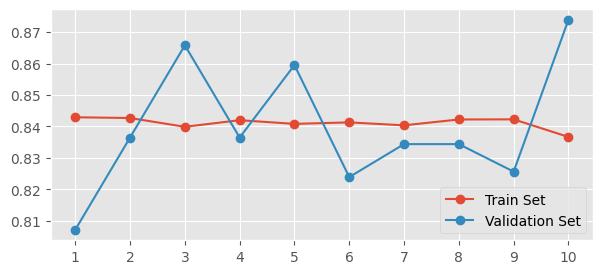

Average Train Set Accuracy: 0.8411167807607025
Average Validation Set Accuracy: 0.8397693039479943


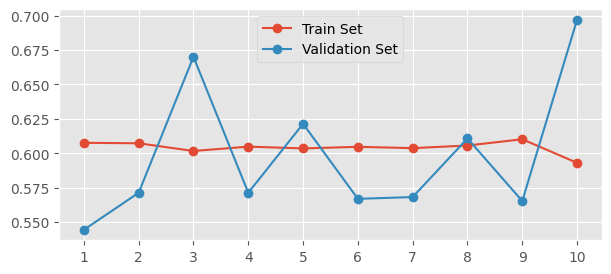

Average Train Set F1 Score: 0.6042928845170287
Average Validation Set F1 Score: 0.598755209941853


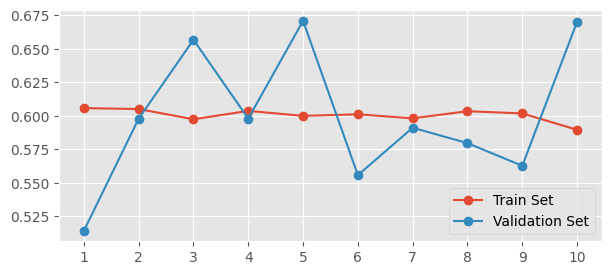

Average Train Set Precision: 0.6004018011978396
Average Validation Set Precision: 0.5995025165744544


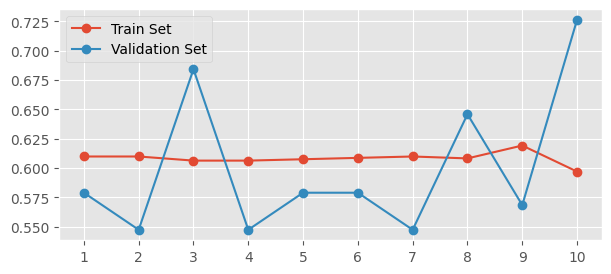

Average Train Set Recall: 0.6082486199923485
Average Validation Set Recall: 0.6003728070175438


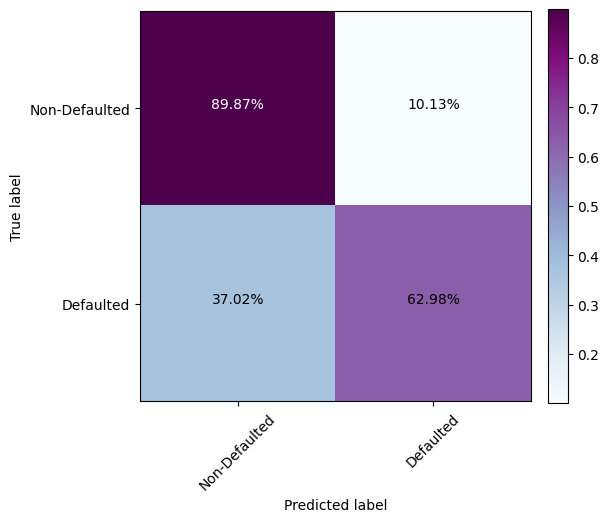

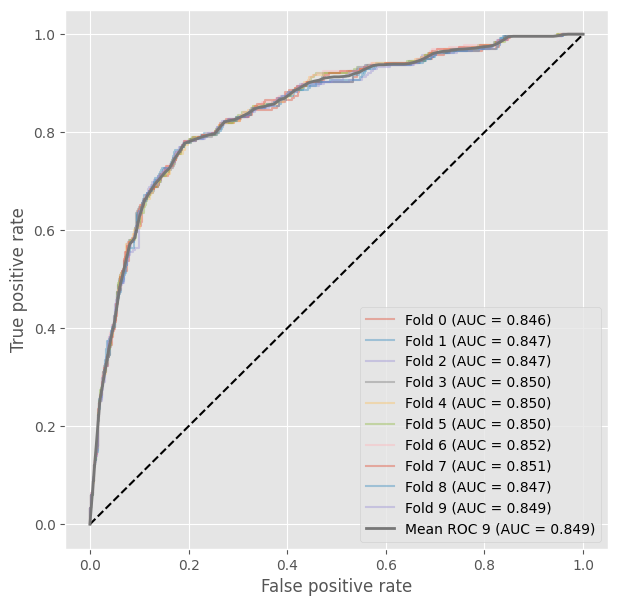

Gini derived from mean AUC 0.6975808505220269


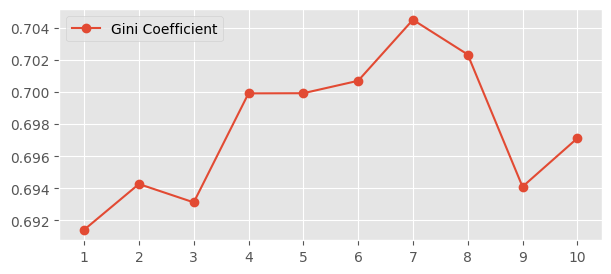

Average Gini Coefficient: 0.6977494142311013


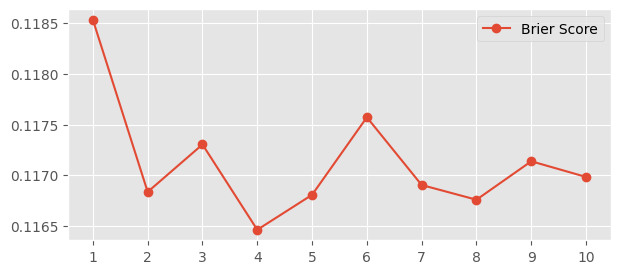

Average Brier Score: 0.11712951689336085


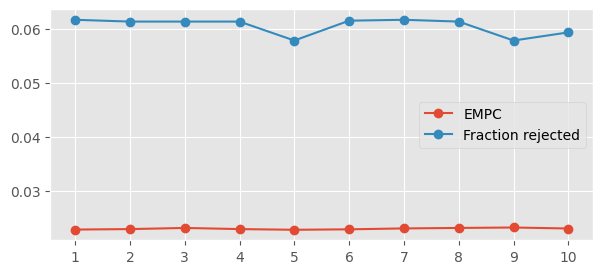

Average EMP: 0.02297720675870456
Average EMP Fractions: 0.060602126593396685


In [2]:
features_scores = utilities.read_features_scores(hmeq_dataset_path)
train_data = utilities.read_parquet(hmeq_dataset_path + 'train.parquet')
test_data = utilities.read_parquet(hmeq_dataset_path + 'test.parquet')

gnbc = GaussianNB()

evaluation.k_fold_cross_validate(clf=gnbc, layers=None, train_data=train_data,
                                 test_data=test_data, target='defaulted',
                                 classes=['Non-Defaulted', 'Defaulted'],
                                 k_folds=10, features_scores=features_scores,
                                 features=11, model_name='GNB', learning_rate=None,
                                 epochs=None, batch_size=None, verbose=True)